# Solving the Quadratic Programming problem using CVXOPT with Linear separable dataset

In [5]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 8)

### Define dataset

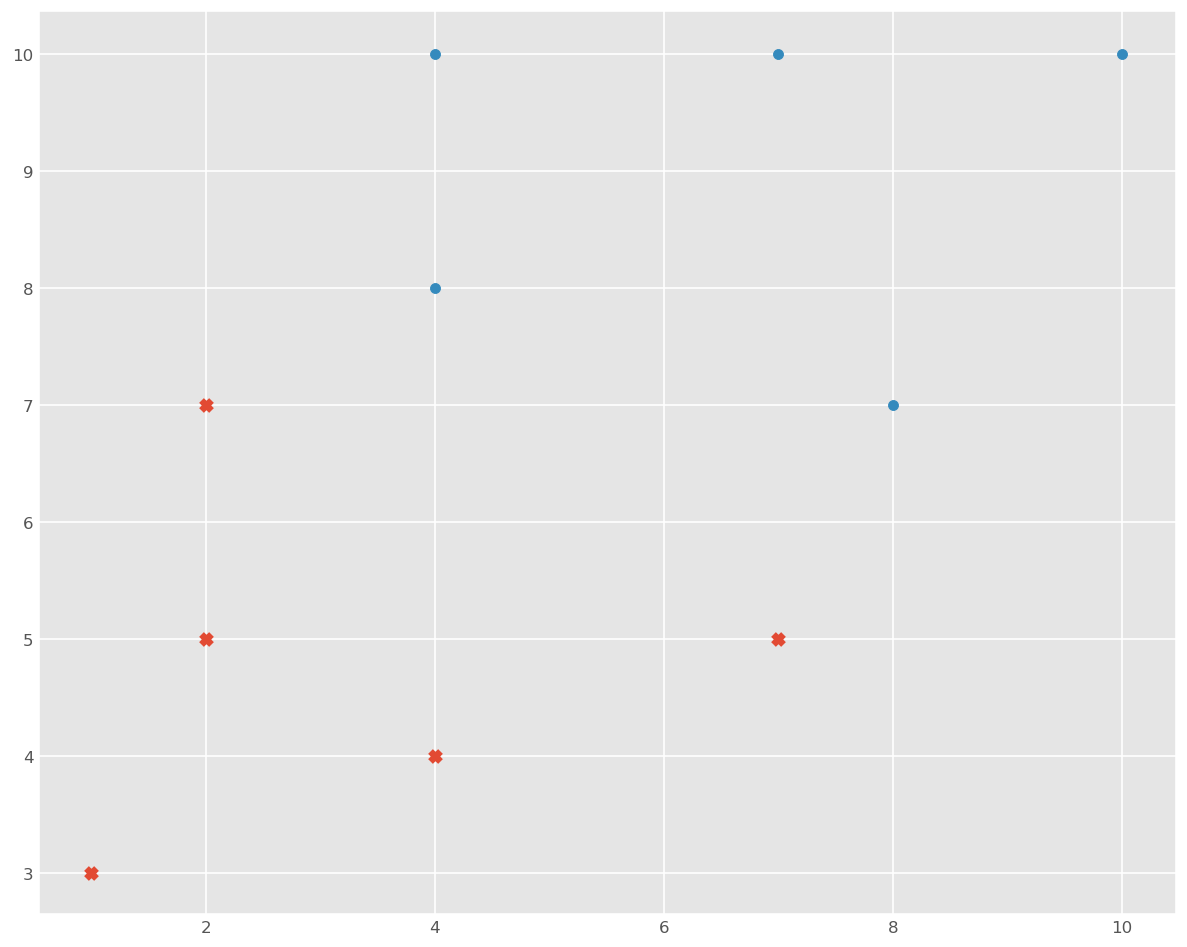

In [6]:
pos_x = np.array([[2,7],[7,5],[4,4],[1,3],[2,5]])
neg_x = np.array([[8,7],[4,10],[7,10],[4,8],[10,10]])

X = np.vstack((pos_x, neg_x))
y = np.hstack((np.ones(len(pos_x), dtype=int), -1 * np.ones(len(neg_x), dtype=int)))

# Plot
plt.figure(dpi=120)
plt.scatter(pos_x[:,0], pos_x[:,1], marker="x")
plt.scatter(neg_x[:,0], neg_x[:,1], marker="o")
plt.tight_layout()
plt.show()

## Quadratic Optimization

### Optimization Parameters

In [20]:
# Gram's Matrix
K = np.matmul(X, X.T)
print(K)
# P
P = np.matmul(y[:,None], y[:,None].T) * K
P = P.astype(float)
P = matrix(P)
print("P: ")
print("{} \n".format(P))
# q
q = -1 * np.ones((X.shape[0], 1))
q = matrix(q)
print("q: ")
print("{} \n".format(q))
# A
A = y.astype(float)
A = A.reshape((1, 10))
A = matrix(A)
print("A: ")
print("{} \n".format(A))
# G
G = -1 * np.eye(X.shape[0])
G = matrix(G)
print("G: ")
print("{} \n".format(G))
# h
h = np.zeros((X.shape[0], 1)).astype(float)
h = matrix(h)
print("h: ")
print("{} \n".format(h))
# b
b = matrix([0.0])

# QP solver 
sol = solvers.qp(P, q, G, h, A, b)

alpha = np.array(sol['x'])[:]
alpha = np.where(alpha < 10e-5, 0, alpha)
print("alpha: ")
print("{} \n".format(alpha))



[[ 53  49  36  23  39  65  78  84  64  90]
 [ 49  74  48  22  39  91  78  99  68 120]
 [ 36  48  32  16  28  60  56  68  48  80]
 [ 23  22  16  10  17  29  34  37  28  40]
 [ 39  39  28  17  29  51  58  64  48  70]
 [ 65  91  60  29  51 113 102 126  88 150]
 [ 78  78  56  34  58 102 116 128  96 140]
 [ 84  99  68  37  64 126 128 149 108 170]
 [ 64  68  48  28  48  88  96 108  80 120]
 [ 90 120  80  40  70 150 140 170 120 200]]
P: 
[ 5.30e+01  4.90e+01  3.60e+01  2.30e+01  3.90e+01 -6.50e+01 -7.80e+01 ... ]
[ 4.90e+01  7.40e+01  4.80e+01  2.20e+01  3.90e+01 -9.10e+01 -7.80e+01 ... ]
[ 3.60e+01  4.80e+01  3.20e+01  1.60e+01  2.80e+01 -6.00e+01 -5.60e+01 ... ]
[ 2.30e+01  2.20e+01  1.60e+01  1.00e+01  1.70e+01 -2.90e+01 -3.40e+01 ... ]
[ 3.90e+01  3.90e+01  2.80e+01  1.70e+01  2.90e+01 -5.10e+01 -5.80e+01 ... ]
[-6.50e+01 -9.10e+01 -6.00e+01 -2.90e+01 -5.10e+01  1.13e+02  1.02e+02 ... ]
[-7.80e+01 -7.80e+01 -5.60e+01 -3.40e+01 -5.80e+01  1.02e+02  1.16e+02 ... ]
[-8.40e+01 -9.90e+01 -6.80

## Compute $w_o$ and $b_o$

In [21]:
# Optimal w
w_optim = np.sum(alpha * y[:,None] * X, axis=0)
print("w_o =", w_optim)

# Optimal b
alpha_pos = alpha[0:5]
alpha_neg = alpha[5:]
x_ind = np.argwhere(alpha_pos > 0)
x_s = X[x_ind[:,0]]
b_optim = 1 - np.dot(w_optim, x_s)
b_optim = b_optim[0]
print("b_o =", b_optim)

# Support Vectors
sv = np.argwhere(alpha > 0)
sv = sv[:,0]

w_o = [-0.44444443 -1.1111111 ]
b_o = 9.666666534970071


## Decision Boundary

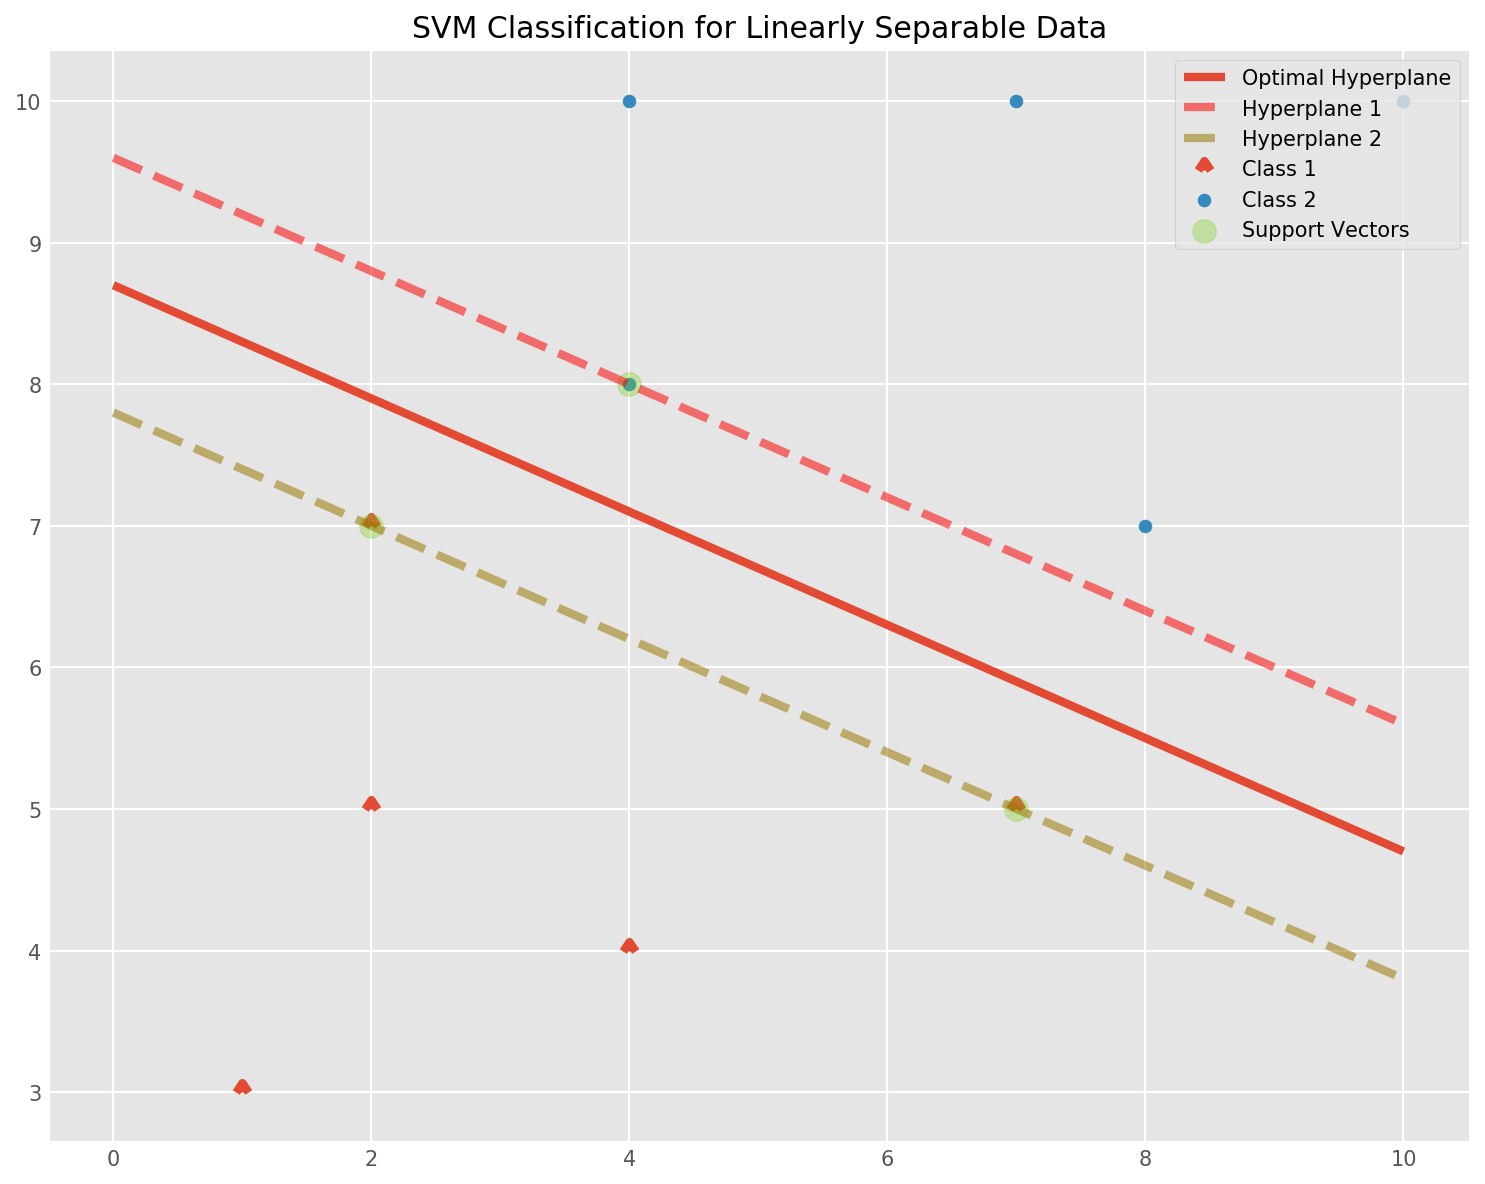

In [27]:
x_ax = np.linspace(0, 10, num=1000)
y_optim = (-w_optim[0] * x_ax - b_optim) / w_optim[1]
y_hp1 = (-w_optim[0] * x_ax - b_optim - 1) / w_optim[1]
y_hp2 = (-w_optim[0] * x_ax - b_optim + 1) / w_optim[1]

# Plot
plt.figure(dpi=150)
plt.scatter(pos_x[:,0], pos_x[:,1], marker=10, label="Class 1")
plt.scatter(neg_x[:,0], neg_x[:,1], marker="o", label="Class 2")
plt.scatter(X[sv,0], X[sv, 1], marker="o", c="#7ad31b55", s=128, label="Support Vectors")
plt.plot(x_ax, y_optim, label="Optimal Hyperplane")
plt.plot(x_ax, y_hp1, linestyle="--", c="#FF000088", label="Hyperplane 1")
plt.plot(x_ax, y_hp2, linestyle="--", c="#99770088", label="Hyperplane 2")
plt.title("SVM Classification for Linearly Separable Data")
plt.tight_layout()
plt.legend()
plt.show()